In [149]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#filtering warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [150]:
#reading data set 

diabetes_df=pd.read_csv('health care diabetes.csv')
diabetes_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [151]:
diabetes_df.shape

(768, 9)

In [152]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [153]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### we are having 8independent and 1dependent columns of 2 data types i.e, Integer and Float , so we don't have any categorical data here

In [154]:
#checking for Zero values for mentioned columns as they need to be treated as missing values
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols:
    print(col)
    print(diabetes_df[col].value_counts()[0])

Glucose
5
BloodPressure
35
SkinThickness
227
Insulin
374
BMI
11


#### we have the above count for zero values for respective columns ,Now ploting Histograms to visualize frequency distribution of each column

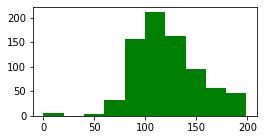

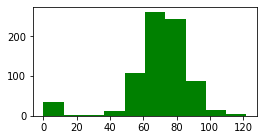

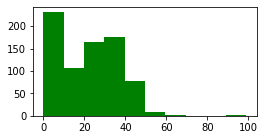

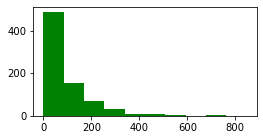

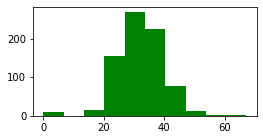

In [155]:

for col in cols:
    plt.figure(figsize=(4,2))
    plt.hist(diabetes_df[col],color='green')
    plt.show()
    


In [156]:
diabetes_df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

#### we have identified the columns with zero or missing values and their counts , now we need to treat them in order to peroform data analysis further. As all the columns are of numeric , replacing missing values with the respective column means

In [157]:
for col in cols:
    diabetes_df[col]=diabetes_df[col].replace([0],[diabetes_df[col].mean()])

In [158]:
for col in cols:
    i=0
    for value in diabetes_df[col].values:
        if value == 0:
            i=i+1
        
    print(col+'- Zero count :')
    print(i)

Glucose- Zero count :
0
BloodPressure- Zero count :
0
SkinThickness- Zero count :
0
Insulin- Zero count :
0
BMI- Zero count :
0


#### from the above output we can see all the zeros are replaced in the respective columns

In [159]:
#creating countplot to show diff data types and the no of columns in each data type
df=pd.DataFrame({'columns':diabetes_df.columns,'dtypes':diabetes_df.dtypes})
df


,columns,dtypes
Pregnancies,Pregnancies,int64
Glucose,Glucose,float64
BloodPressure,BloodPressure,float64
SkinThickness,SkinThickness,float64
Insulin,Insulin,float64
BMI,BMI,float64
DiabetesPedigreeFunction,DiabetesPedigreeFunction,float64
Age,Age,int64
Outcome,Outcome,int64


<AxesSubplot:xlabel='dtypes', ylabel='count'>

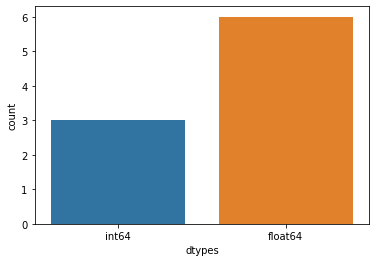

In [160]:
sns.countplot(x='dtypes',data=df)

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

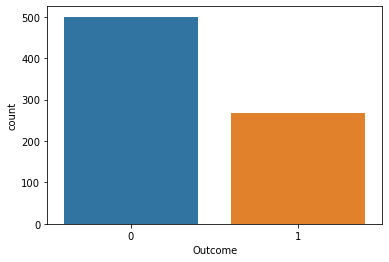

In [161]:
# checking the balance of the data set by creating count plot of target varaible
print(diabetes_df['Outcome'].value_counts())
sns.countplot(x='Outcome',data=diabetes_df)

#### from the above output we can clearly see the ratio of value 1 is nearly half of the value 0, this is nearly 1:2 ratio ,so this was clearly imbalanced data set, for an imbalanced data set f1-score was appropriate metric for evaluating model rather than accuracy.

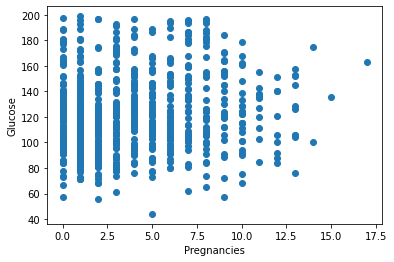

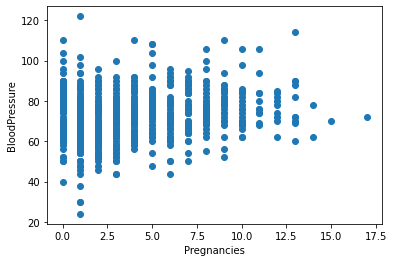

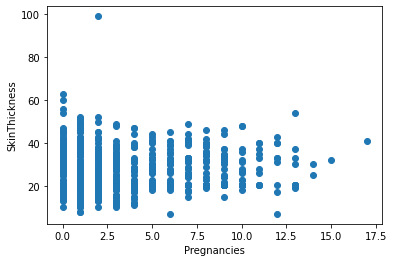

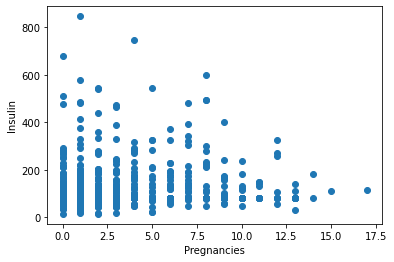

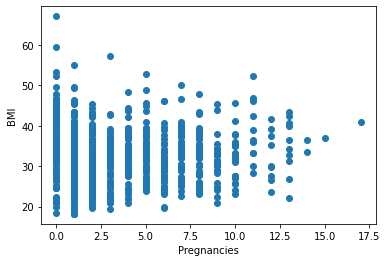

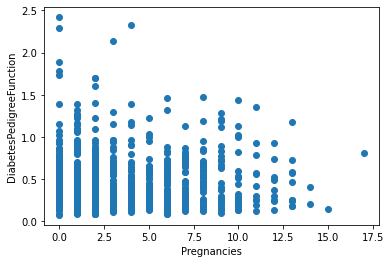

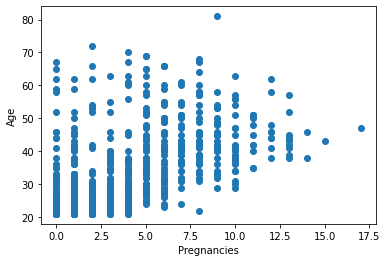

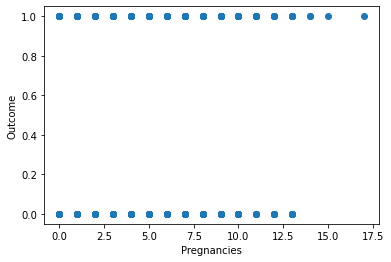

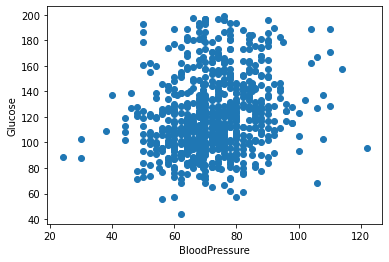

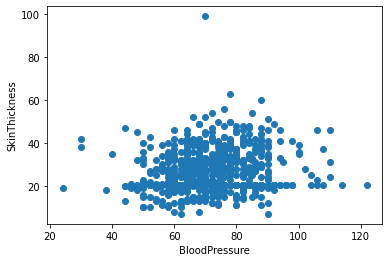

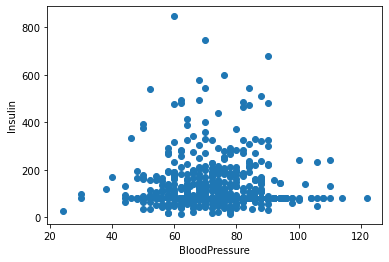

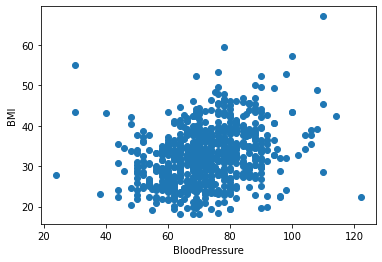

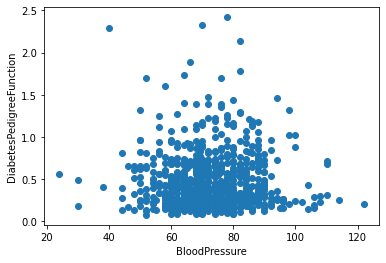

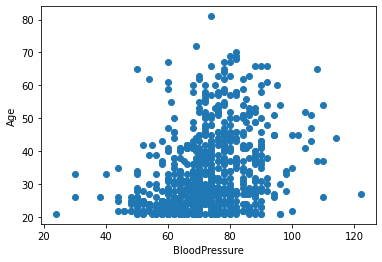

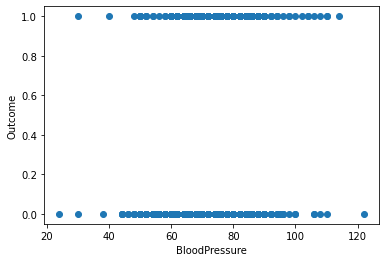

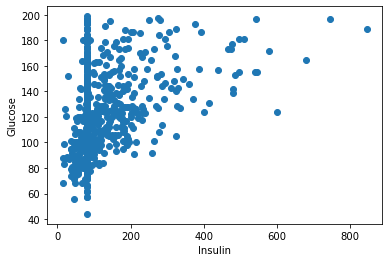

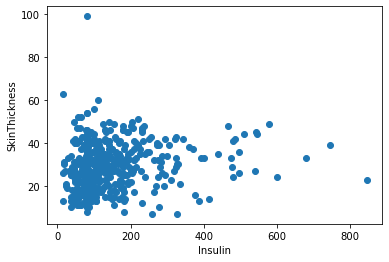

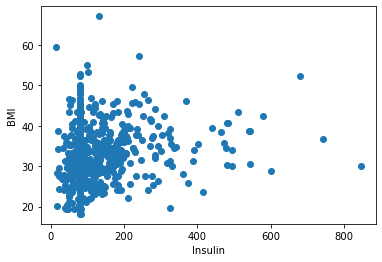

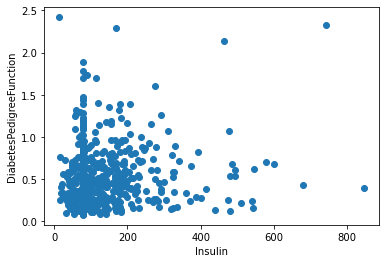

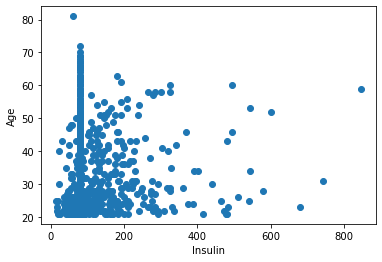

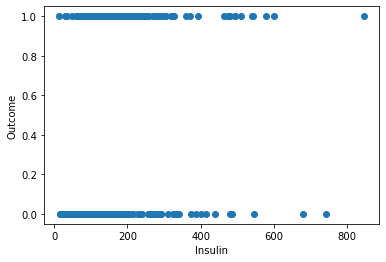

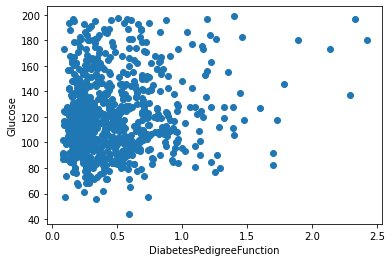

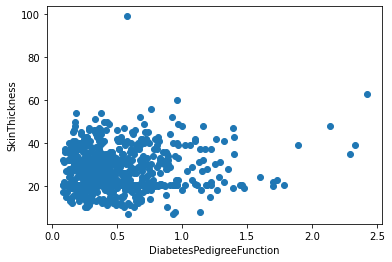

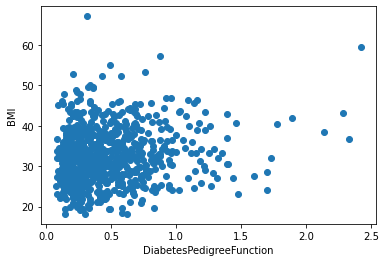

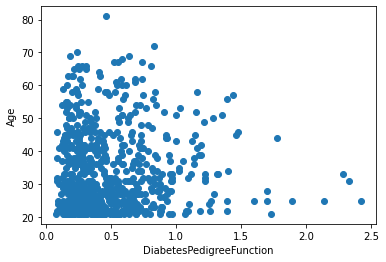

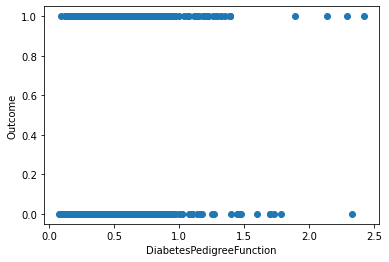

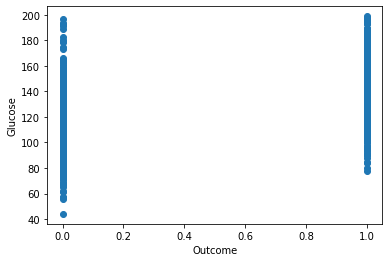

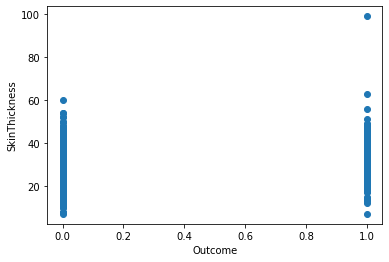

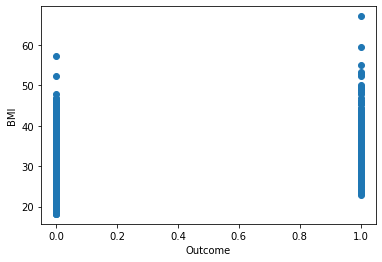

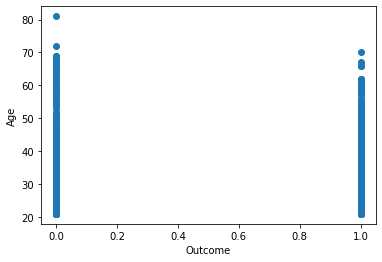

In [162]:
columns=list(diabetes_df.columns)
for col1 in columns:
    for col2 in columns:
        if col1==col2:
            continue
        plt.scatter(x=diabetes_df[col1],y=diabetes_df[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
    columns.remove(col1)

<AxesSubplot:>

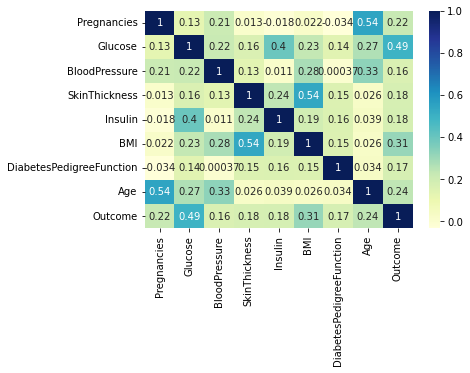

In [163]:
# creating heat map to show the correlations b/w variables
matrix=diabetes_df.corr()
sns.heatmap(matrix,cmap="YlGnBu", annot=True)

#### from the above scatter plots and heat map, we can evidently see that there is no strong correlation among independent variables  

In [164]:
#splitting the data set into independent and target variables

x=diabetes_df.iloc[:,:-1]
predictors=x
y=diabetes_df.iloc[:,-1]
target=y

In [165]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31


In [166]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [167]:
#applying standard scaler to normalize the data for all the columns.

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x=ss.fit_transform(x)
x

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

### As the target variable is binary and discrete, we need to identify the appropriate classification algorithm that gives the best f1-score and accuracy,
#### here we are using logistic regression ,KNN classifier,Decission Tree classifier, Random forest and XGBoost classifiers

#### we are using cross validation to identify the best model that gives good metric value, from the below output we can see the logistic regression was performing better as it was a binary classification problem.

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
xgb_classifier=xgb.XGBClassifier(objective="binary:logistic", random_state = 0)
models=[lr,knn,dtc,rfc,xgb_classifier]

In [169]:
from sklearn.model_selection import cross_val_score
for model in models:
    metrics_dict={}
    f1=cross_val_score(model,x,y,scoring='f1',cv=10)
    acc=cross_val_score(model,x,y,scoring='accuracy',cv=10)
    metrics_dict['model']=str(model)[0:12]
    metrics_dict['f1-score']=f1.mean()
    metrics_dict['accuracy']=acc.mean()
    print(metrics_dict)

{'model': 'LogisticRegr', 'f1-score': 0.6293467840769631, 'accuracy': 0.7695830485304169}
{'model': 'KNeighborsCl', 'f1-score': 0.6113772536074327, 'accuracy': 0.7382946001367056}
{'model': 'DecisionTree', 'f1-score': 0.5579219880947456, 'accuracy': 0.6797846889952153}
{'model': 'RandomForest', 'f1-score': 0.6313350565388768, 'accuracy': 0.7604066985645934}
{'model': 'XGBClassifie', 'f1-score': 0.6292623304050499, 'accuracy': 0.7434894053315106}


#### Now we are proceeding with build our actual logistic regression model to predict the outcome whether patient is diabetic or not.

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.2,random_state=34)


#normalizing the data
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [173]:
log_reg=LogisticRegression()
main_model=log_reg.fit(x_train,y_train)

In [174]:
# prdicting over test set
y_pred=main_model.predict(x_test)

In [176]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report,confusion_matrix


print('f1-score :')
print(f1_score(y_pred,y_test))
print('accuracy_score :')
print(accuracy_score(y_pred,y_test))
print('precision-score :')
print(precision_score(y_pred,y_test))
print('recall-score :')
print(recall_score(y_pred,y_test))
print('confusion matrix :')
print(confusion_matrix(y_pred,y_test))
print('calssification report :')
print(classification_report(y_pred,y_test))

f1-score :
0.6744186046511628
accuracy_score :
0.8181818181818182
precision-score :
0.5918367346938775
recall-score :
0.7837837837837838
confusion matrix :
[[97 20]
 [ 8 29]]
calssification report :
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       117
           1       0.59      0.78      0.67        37

    accuracy                           0.82       154
   macro avg       0.76      0.81      0.77       154
weighted avg       0.84      0.82      0.83       154



In [177]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [178]:
auc_score=roc_auc_score(y_test,y_pred)

In [179]:
auc_score

0.7578231292517007

In [181]:
fpr,tpr,thresholds=roc_curve(y_test,main_model.predict_proba(x_test)[:,1])

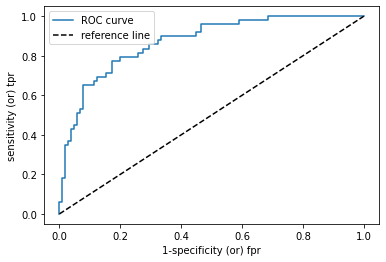

In [184]:
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--',label='reference line')
plt.xlabel('1-specificity (or) fpr')
plt.ylabel('sensitivity (or) tpr')
plt.legend()
plt.show()

#### From the above ROC curve we got AUC value is 0.7578231292517007, which shows the model is a fair model,

taking threshold as 0.4 since a patient with diabetes need to be classified correctly
then 

In [190]:
y_prob=main_model.predict_proba(x_test)[:,1]

In [192]:
y_predict_class = [1 if prob > 0.4 else 0 for prob in y_prob]

In [193]:
print('tpr :')
print(recall_score(y_test,y_predict_class))
print('f1_score : ')
print(f1_score(y_test,y_predict_class))
print('accuracy_score : ')
print(accuracy_score(y_test,y_predict_class))

tpr :
0.6938775510204082
f1_score : 
0.6938775510204082
accuracy_score : 
0.8051948051948052
